# Interpolation polynomiale

In [1]:
%pylab inline
import time

Populating the interactive namespace from numpy and matplotlib


## 1 - Comparaison de deux méthodes d'évaluation de polynômes


### Méthode naïve
On veut évaluer, en un $c$ donné, le polynôme $p$ défini par 
$$
p(x) = a_0 + a_1 x +a_2 x^2 + ... + a_{n-1} x^{n-1}+  a_n x^n.
$$

**Question **: étant donnés un réel $c$ et une liste $a = [a_0, a_1, a_2, ..., a_{n-1}, a_n]$, écrire une fonction **p1(c,a)** qui prend comme arguments **c** et **a** et qui calcule $p(c)$ le plus naïvement possible.

On pourra vérifier que l'évaluation de $p(x) = 1+2x+3x^2$ en $c = 5$ vaut $86$.

In [2]:
def p1(c,a):
    s=0
    for i in range(len(a)):
        s=s+a[i]*c**i
    return s

In [3]:
p1(5,[1,2,3])

86

### Algorithme de Hörner

On rappelle l'algorithme de Hörner vu en TD : si on définit la suite $(b_k)_{k = 0, ..., n}$ par
$$
\left\{
\begin{array}{rcll}
b_n & = & a_n\\
b_k & = & b_{k+1} c +a_k & \forall k = n-1, n-2, ..., 1, 0.
\end{array}
\right.
$$
On peut montrer que $p(x) = (x-c)(b_n x^{n-1}+b_{n-1}x^{n-2}+...+b_2 x+b_1)+b_0$ et donc que $p(c) = b_0$.

**Question **: étant donnés un réel $c$ et une liste $a = [a_0, a_1, a_2, ..., a_{n-1}, a_n]$, écrire une fonction **p2(c,a)** qui prend comme arguments **c** et **a** et qui calcule $p(c)$ en utilisant l'algorithme de Hörner.

In [4]:
def p2(c,a):
    b=a[-1]
    for i in range(len(a)-2,-1,-1):
        b=b*c+a[i]
    return b

In [5]:
p2(5,[1,2,3])

86

### Comparaison

Dans le code ci-dessous, on compare les temps de calcul, en un vecteur $c$ de taille $1000$, des deux algorithmes précédents (naïf et Hörner) pour des degrés de polynôme croissants. Qu'en concluez-vous ?

Text(0,0.5,"temps d'évaluation du polynôme, en secondes")

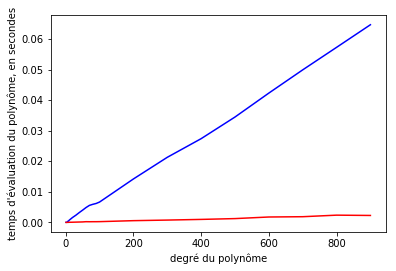

In [6]:
c = rand(1000,1)
tps1 = []
tps2 = []
abscisses = []
for n in range(1,10,1):
    abscisses.append(n)
    atest = rand(n,1)
    
    deb = time.time()
    val1 = p1(c,atest)
    tps1.append(time.time()-deb)
    
    deb = time.time()
    val2 = p2(c,atest)
    tps2.append(time.time()-deb)
for n in range(10,100,10):
    abscisses.append(n)
    atest = rand(n,1)
    
    deb = time.time()
    val1 = p1(c,atest)
    tps1.append(time.time()-deb)
    
    deb = time.time()
    val2 = p2(c,atest)
    tps2.append(time.time()-deb)
for n in range(100,1000,100):
    abscisses.append(n)
    atest = rand(n,1)
    
    deb = time.time()
    val1 = p1(c,atest)
    tps1.append(time.time()-deb)
    
    deb = time.time()
    val2 = p2(c,atest)
    tps2.append(time.time()-deb)

plot(abscisses,tps1,color='b')
plot(abscisses,tps2,color='r')
xlabel("degré du polynôme")
ylabel("temps d'évaluation du polynôme, en secondes")

## 2 - Quelques préliminaires


### Subdivision régulière

**Question** : écrire une fonction **equirep** qui prend $a$, $b$ et $d$ comme arguments et qui produit $d+1$ points $a_0 = a$, $a_1$, ..., $a_d = b$ équirépartis dans l'intervalle $[a,b]$.

Vérifier que **equirep(-1,1,5)** retourne **[-1.  -0.6 -0.2  0.2  0.6  1. ]**.

In [7]:
def equirep(a,b,d):
    v=(b-a)/d
    l=[]
    for i in range(d+1):
        l.append(a+i*v)
    return l

In [8]:
equirep(-1,1,5)

[-1.0,
 -0.6,
 -0.19999999999999996,
 0.20000000000000018,
 0.6000000000000001,
 1.0]

### Une première fonction test

**Question** : écrire une fonction **jolie** qui, étant donné un vecteur $x$, retourne le vecteur des images de chaque composante de $x$ par la fonction $f$ définie sur $\mathbb{R}$ par $f(x) = x\sin(\pi x).$

On pourra vérifier que **jolie([-1.5,0,1.5,2]) = [ -1.50000000e+00   0.00000000e+00  -1.50000000e+00  -4.89858720e-16]**.

In [9]:
def jolie(x):
    l=[e*sin(pi*e) for e in x]
    return l

In [10]:
jolie([-1.5,0,1.5,2])

[-1.5, 0.0, -1.5, -4.898587196589413e-16]

**Question** : En utilisant **equirep** et **jolie**, tracer en bleu la fonction $f$ sur l'intervalle $[-1.5,1.5]$. On veillera à utiliser suffisamment de points pour que le tracé soit bien lisse.

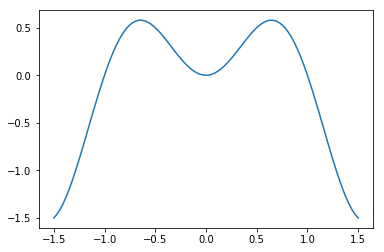

In [11]:
I=equirep(-1.5,1.5,100)
J=jolie(I)
plot(I,J)

### Une seconde fonction test

**Question** : écrire une fonction **cloche** qui, étant donné un vecteur $x$, retourne le vecteur des images de chaque composante de $x$ par la fonction $g$ définie sur $\mathbb{R}$ par
$$
g(x) = \dfrac{1}{1+100 x^2}.
$$

On pourra vérifier que **cloche([-1,0,1,2]) = [ 0.00990099  1.          0.00990099  0.00249377]**.

In [12]:
def cloche(x):
    l=[1/(1+100*e**2) for e in x]
    return l

In [13]:
cloche([-1,0,1,2])

[0.009900990099009901, 1.0, 0.009900990099009901, 0.0024937655860349127]

**Question** : En utilisant **equirep** et **cloche**, tracer en rouge la fonction $g$ sur l'intervalle $[-1.5,1.5]$. On veillera à utiliser suffisamment de points pour que le tracé soit bien lisse.

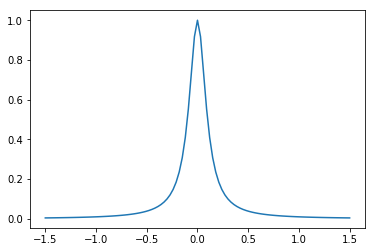

In [14]:
I=equirep(-1.5,1.5,100)
J=cloche(I)
plot(I,J)

## 3 - Construction de la forme de Lagrange du polynôme d'interpolation

On rappelle que l'unique polynôme $p$ de degré $\leq d$ tel que 
$p(a_i) = f_i$, $\forall i = 0, ..., d$, 
est donné, $\forall x \in \mathbb{R}$, par la formule
$$
p(x) = \sum_{j = 0}^{d} f_{j} l_{j,d}(x) 
\mbox{ avec } 
l_{j,d}(x) = \prod_{\stackrel{k = 0}{k\neq j}}^{d} \dfrac{x-a_k}{a_j-a_k}.
$$

**Question** : écrire une fonction **lagrange** qui prend un réel $c$ et 2 vecteurs $avec$ (contenant les abscisses $a_i$) et $fvec$ (contenant les ordonnées $f_i$) comme arguments d'entrée et qui produit le réel $p(c)$. 
    
On testera cette fonction avec $avec = [0,1,2]$ et $fvec = [0,1,4]$.
On vérifiera que **lagrange(avec[i],avec,fvec)** retourne $fvec[i]$ pour $i = 0,1,2$.

In [15]:
def lagrange(c,avec,fvec):
    s=0
    d=len(avec)
    for j in range(d):
        p=1
        for k in range(d):
            if (k!=j):
                p=p*(c-avec[k])/(avec[j]-avec[k])
        s=s+fvec[j]*p
    return s

In [16]:
avec=[0,1,2]
fvec=[0,1,4]

for i in range(len(avec)):
    print(lagrange(avec[i],avec,fvec)==fvec[i])

True
True
True


**Question** : écrire une fonction **trace_e** qui, pour les arguments d'entrée $a$, $b$, $d$ et **nom_fonction**, trace sur un même graphique la fonction **nom_fonction** **en rouge**, les points d'interpolation **en noir** et le polynôme d'interpolation aux points équidistants **en bleu** sur l'intervalle $[a,b]$. 

On pourra tester cette fonction avec $a = -1$, $b = 1$ et **jolie**, en faisant varier $d$ pour observer ce qui se passe.

In [17]:
def trace_e(a,b,d,nom_fonction):
    
    I=equirep(a,b,100)
    J=nom_fonction(I)
    plot(I,J,'r')
    
    avec=equirep(a,b,d)
    fvec=nom_fonction(avec)
    plot(avec,fvec,'kx')
    L=[lagrange(e,avec,fvec) for e in I]
    plot(I,L,'b')
    return None

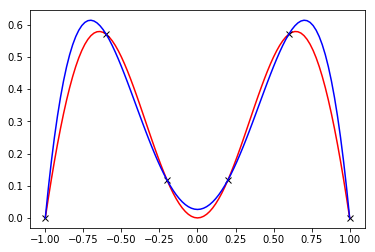

In [18]:
trace_e(-1,1,5,jolie)

**Question** : tester maintenant **trace_e** avec $a = -1$, $b = 1$ et **cloche**, en faisant varier $d$ pour observer ce qui se passe.

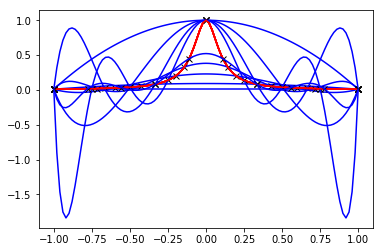

In [19]:
for i in range(1,10):    
    trace_e(-1,1,i,cloche)

In [20]:
#Optionnel

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

def anim(i):
    axis([-1-0.1,1+0.1,-0.1-0.1,1+0.1])
    trace_e(-1,1,i,cloche)
    return None

interact(anim,i=widgets.IntSlider(min=1, max=30, step=1, value=10,continuous_update=False))

interactive(children=(IntSlider(value=10, continuous_update=False, description='i', max=30, min=1), Output()),…

<function __main__.anim(i)>

## 4 - Points de Chebyshev

Les points de Chebyshev dans l'intervalle $[a,b]$ sont donnés par la formule suivante : 
$$
a_i = \dfrac{a+b}{2}+\dfrac{b-a}{2}\cos\left(\dfrac{2i+1}{2(d+1)}\pi\right), 
\quad i = 0, ..., d.
$$

**Question** : écrire une fonction **cheb** qui prend $a$, $b$ et $d$ comme arguments et qui produit les $d+1$ points de Chebyshev dans l'intervalle $[a,b]$.

Vérifier que **cheb(-1,1,5)** retourne **[-0.96592583 -0.70710678 -0.25881905  0.25881905  0.70710678  0.96592583]**.

In [21]:
def cheb(a,b,d):
    l=[(a+b)/2+((b-a)/2)*cos(pi*(2*i+1)/(2*(d+1))) for i in range(d+1)]
    return l

In [22]:
cheb(-1,1,5)

[0.9659258262890683,
 0.7071067811865476,
 0.25881904510252074,
 -0.25881904510252063,
 -0.7071067811865475,
 -0.9659258262890682]

**Question** : tracer les deux suvdivisions de l'intervalle $[5,10]$ de 2 couleurs différentes, afin de comprendre la différence entre les deux.

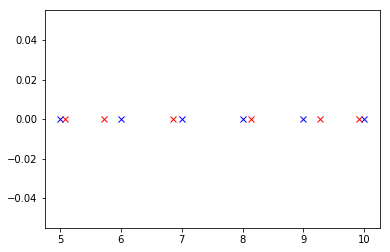

In [23]:
d=5

I=equirep(5,10,d)
J=cheb(5,10,d)
plot(I,zeros(len(I)),'bx')
plot(J,zeros(len(J)),'rx')

**Question** : écrire une fonction **trace_c** qui, pour les arguments d'entrée $a$, $b$, $d$ et **nom_fonction**, trace sur un même graphique la fonction **nom_fonction** **en rouge**, les points d'interpolation **en noir** et le polynôme d'interpolation aux points de Chebyshev **en vert** sur l'intervalle $[a,b]$. 

On pourra tester cette fonction avec $a = -1$, $b = 1$ et **jolie**, en faisant varier $d$ pour observer ce qui se passe.

In [24]:
def trace_c(a,b,d,nom_fonction):
    
    I=equirep(a,b,100)
    J=nom_fonction(I)
    plot(I,J,'r')
    
    avec=cheb(a,b,d)
    fvec=nom_fonction(avec)
    plot(avec,fvec,'kx')
    
    L=[lagrange(e,avec,fvec) for e in I]
    plot(I,L,'b')
    
    return None

**Question** : tester maintenant **trace_c** avec $a = -1$, $b = 1$ et **cloche**, en faisant varier $d$ pour observer ce qui se passe.

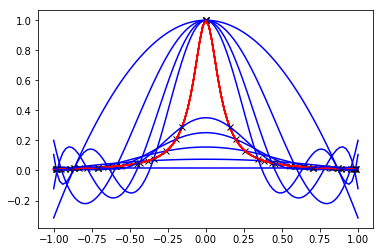

In [25]:
for i in range(1,10):
    trace_c(-1,1,i,cloche)

In [26]:
#Optionnel

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

def anim(i):
    axis([-1-0.1,1+0.1,-0.1-0.1,1+0.1])
    trace_c(-1,1,i,cloche)
    return None

interact(anim,i=widgets.IntSlider(min=1, max=30, step=1, value=10,continuous_update=False))

interactive(children=(IntSlider(value=10, continuous_update=False, description='i', max=30, min=1), Output()),…

<function __main__.anim(i)>

## 5 - Différences divisées et forme de Newton

Nous allons maintenant programmer la forme de Newton du polynôme d'interpolation de Lagrange. 

Pour ce faire, nous allons commencer par écrire une fonction **DD** qui prend 2 vecteurs $avec$ (contenant les abscisses $a_i$) et $fvec$ (contenant les ordonnées $f_i$) comme arguments d'entrée et qui produit la matrice des différences divisées.

On rappelle que les différences divisées s'obtiennent par récurrence : pour tout entier $l\geq 1$, 
$$
f[a_0, a_1, ..., a_l] = \dfrac{f[a_1, a_2, ..., a_l]-f[a_0, a_1, ..., a_{l-1}]}{a_l-a_0}.
$$

In [27]:
def DD(avec,fvec):
    n=len(avec)
    M=zeros([n,n])
    M[:,0]=fvec
    for j in range(1,n):
        for i in range(j,n):
            M[i,j]=(M[i,j-1]-M[i-1,j-1])/(avec[i]-avec[i-j])
    return M

In [28]:
DD([0,1,2],[0,1,4])

array([[0., 0., 0.],
       [1., 1., 0.],
       [4., 3., 1.]])

On construit maintenant une fonction **newton** qui prend comme arguments d'entrée 
+ le vecteur $avec$ contenant les abscisses $a_i$, 
+ la matrice $D$ des différences divisées associées 
+ et un scalaire $c$  

et qui produit le scalaire $p(c)$ en utilisant la forme de Newton du polynôme d'interpolation de Lagrange. 

On rappelle ci-dessous l'algorithme qui permet de calculer $P := p(c)$ connaissant $avec$, $f$, $D$ et $c$ :

+ $P = 0$
+ $\pi = 1$
+ Pour $j$ de $0$ à $d$ faire
    + $P = P+D_{j,j}\times\pi$ 
    + $\pi = \pi\times (c-a_j)$
    
On testera cette fonction avec $avec = [0,1,2]$ et $fvec = [0,1,4]$.
On vérifiera que **newton(avec[i],avec,D)** retourne $fvec[i]$ pour $i = 0,1,2$.

In [29]:
def newton(c,avec,D):
    p=0
    pi=1
    d=len(avec)
    for j in range(d):
        p=p+D[j,j]*pi
        pi=pi*(c-avec[j])
    return p

In [30]:
avec=[0,1,2]
fvec=[0,1,4]

D=DD(avec,fvec)

for i in range(len(avec)):
    print(newton(avec[i],avec,D)==fvec[i])

True
True
True


## 6 - Testons l'intérêt de la forme de Newton : l'ajout d'un point

Illustrons maintenant l'intérêt de la forme de Newton par rapport à celle de Lagrange, en voyant ce qui doit être modifié si on ajoute un point d'interpolation, c'est à dire si $avec$ et $fvec$ sont augmentés d'une case.

Pour ce faire on écrit une fonction **ajout_point(avec,fvec,D,u,v)** qui augmente 
+ le vecteur $avec$ de $u$,
+ le vecteur $fvec$ de $v$
+ et la matrice $D$ de la ligne correspondant à l'ajout du point d'interpolation $(u,v)$.

On testera cette fonction en ajoutant l'abscisse $0.5$ au tableau $avec$ utilisé à la question précédente.

In [31]:
def ajout_point(avec,fvec,D,u,v):
    n=len(avec)
    avecbis=append(avec,u)
    fvecbis=append(fvec,v)
    Dbis=zeros([n+1,n+1])
    Dbis[:n,:n]=copy(D)
    Dbis[n,0]=v
    for j in range(1,n+1):
        Dbis[n,j]=(Dbis[n,j-1]-Dbis[n-1,j-1])/(avecbis[n]-avecbis[n-j])
    return avecbis,fvecbis,Dbis

In [32]:
avec=[0,1,2]
fvec=[0,1,4]

D=DD(avec,fvec)

ajout_point(avec,fvec,D,0.5,0.25)

(array([0. , 1. , 2. , 0.5]),
 array([0.  , 1.  , 4.  , 0.25]),
 array([[0.  , 0.  , 0.  , 0.  ],
        [1.  , 1.  , 0.  , 0.  ],
        [4.  , 3.  , 1.  , 0.  ],
        [0.25, 2.5 , 1.  , 0.  ]]))

On construit une fonction **newton_ap(avecnew,Dnew,P,pi,x)** qui met à jour la valeur $P$ du polynôme d'interpolation de Lagrange au point $x$ lorqu'on a ajouté le point $(u,v)$ aux points d'interpolation.

On testera cette fonction en ajoutant l'abscisse $0.5$ au tableau $avec$ et en comparant la valeur des 2 polynômes d'interpolation à la réponse de cloche, précisément en cette nouvelle abscisse.

In [33]:
def newton_ap(avecbis,Dbis,p,pi,x):
    d=len(avecbis)
    p=p+Dbis[d,d]*pi
    pi=pi*(c-avec[d])
    return None